In [1]:
import pandas as pd
# Load the dataset
file_path = 'Merged_Datasets.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

C:\Users\conor\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1936,18.98,31.43,170.19,NaN,NaN,NaN,NaN,NaN,NaN
1,1937,17.91,31.26,158.69,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,16.60,31.23,155.08,NaN,NaN,NaN,NaN,NaN,NaN
3,1939,15.30,37.42,149.68,NaN,NaN,NaN,NaN,NaN,NaN
4,1940,14.62,36.18,121.06,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration and Cleaning

In [2]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  77 non-null     int64  
 1   Denmark_Public_Debt_Pc_of_GDP         69 non-null     float64
 2   Ireland_Public_Debt_Pc_of_GDP         69 non-null     float64
 3   United Kingdom_Public_Debt_Pc_of_GDP  69 non-null     float64
 4   Denmark_Inflation                     63 non-null     float64
 5   United Kingdom_Inflation              63 non-null     float64
 6   Ireland_Inflation                     63 non-null     float64
 7   Denmark_GDP                           62 non-null     float64
 8   United Kingdom_GDP                    62 non-null     float64
 9   Ireland_GDP                           52 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 6.1 KB


In [3]:
# Statistics
data.describe()



,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
count,77.000000,69.000000,69.000000,69.000000,63.000000,63.000000,63.000000,62.000000,62.000000,52.000000
mean,1982.454545,32.408841,55.662174,81.209710,4.441994,5.094311,5.254455,2.407397,2.341721,5.294906
std,24.790992,21.412874,24.780013,53.413157,3.543850,4.803754,5.515640,2.436062,2.733675,4.628439
min,1936.000000,4.260000,24.810000,28.800000,0.250000,0.368047,-4.478103,-4.906548,-10.359901,-5.095783
25%,1965.000000,12.450000,36.180000,41.540000,1.888633,2.145140,1.944152,0.844674,1.679205,2.933531
50%,1984.000000,29.130000,47.740000,54.560000,2.903282,3.427609,3.317321,2.339616,2.578172,5.257570
75%,2003.000000,49.080000,75.050000,108.550000,6.735295,6.218981,7.564920,3.902034,3.821761,7.587544
max,2022.000000,69.230000,119.480000,269.800000,15.275206,24.207288,20.875850,9.269938,8.674904,24.475253


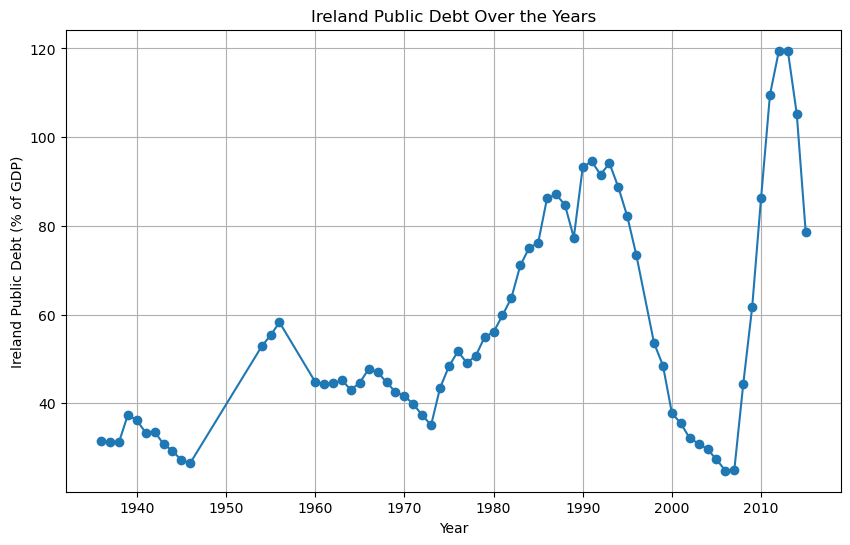

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

# Extract the columns for plotting
year = data['Year']
public_debt_percentage = data['Ireland_Public_Debt_Pc_of_GDP']

# Create the plot
plt.plot(year, public_debt_percentage, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Ireland Public Debt (% of GDP)')
plt.title('Ireland Public Debt Over the Years')

# Display the plot
plt.grid(True)
plt.show()


In [5]:
# Checking for missing values in dataset
data.isnull().sum()

Year                                     0
Denmark_Public_Debt_Pc_of_GDP            8
Ireland_Public_Debt_Pc_of_GDP            8
United Kingdom_Public_Debt_Pc_of_GDP     8
Denmark_Inflation                       14
United Kingdom_Inflation                14
Ireland_Inflation                       14
Denmark_GDP                             15
United Kingdom_GDP                      15
Ireland_GDP                             25
dtype: int64

In [6]:
missing_data_by_year = data[data.isnull().any(axis=1)]['Year'].unique()

print(missing_data_by_year)


[1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1954 1955 1956
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1997 2016 2017
 2018 2019 2020 2021 2022]


In [7]:
# 1936-1946
# 1954-1956
# 1960-1970
# 1997
# 2016-2022


In [8]:
#Before imputing data we need to ensure it is ordered correctly by time
data.sort_values(by='Year', inplace=True)
data.reset_index(drop=True, inplace=True)

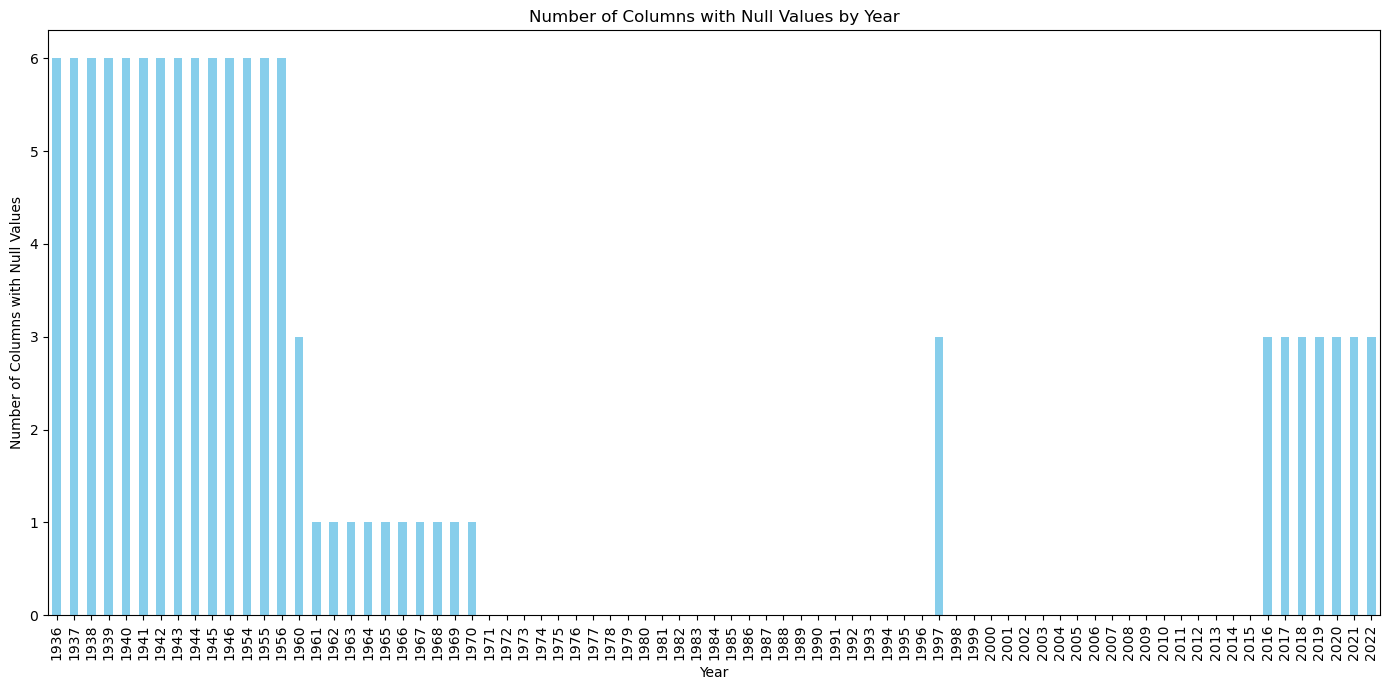

In [9]:
null_counts_by_year = data.isnull().groupby(data['Year']).sum()

# Since we're interested in the number of columns with null values, not the total count of nulls,
# we need to count columns with any nulls per year. We'll adjust the calculation accordingly.
null_columns_count_by_year = null_counts_by_year.apply(lambda x: x > 0).sum(axis=1)

import matplotlib.pyplot as plt

# Plotting the year-by-year look at the number of columns with null values
plt.figure(figsize=(14, 7))
null_columns_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Columns with Null Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Columns with Null Values')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [10]:
#remove years before 1970 and after 2016
data = data[(data['Year'] >= 1970) & (data['Year'] < 2016)]

# Apply linear interpolation to fill missing values for 1997
data = data.interpolate(method='linear')

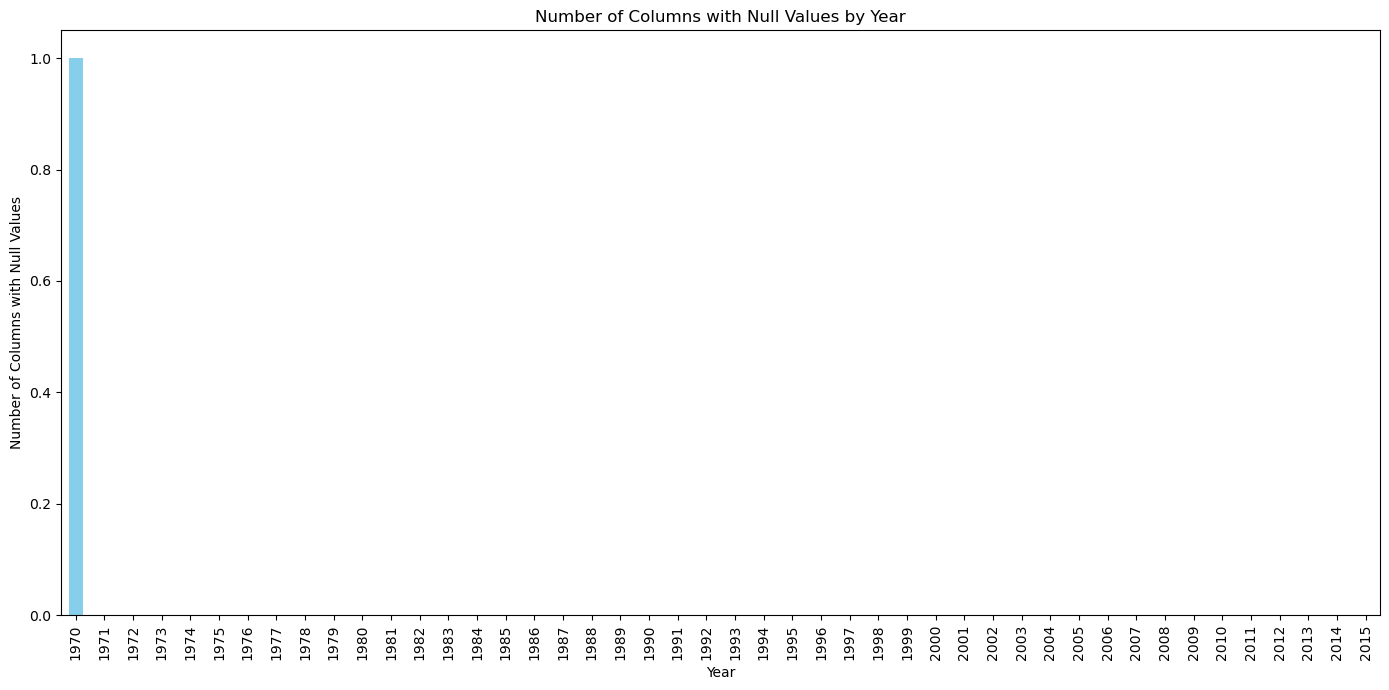

Year                                    0
Denmark_Public_Debt_Pc_of_GDP           0
Ireland_Public_Debt_Pc_of_GDP           0
United Kingdom_Public_Debt_Pc_of_GDP    0
Denmark_Inflation                       0
United Kingdom_Inflation                0
Ireland_Inflation                       0
Denmark_GDP                             0
United Kingdom_GDP                      0
Ireland_GDP                             1
dtype: int64

In [11]:

##run the same graph again
null_counts_by_year = data.isnull().groupby(data['Year']).sum()

null_columns_count_by_year = null_counts_by_year.apply(lambda x: x > 0).sum(axis=1)

import matplotlib.pyplot as plt

# Plotting the year-by-year look at the number of columns with null values
plt.figure(figsize=(14, 7))
null_columns_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Columns with Null Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Columns with Null Values')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()
data.isnull().sum()

In [12]:
data['Ireland_GDP'] = data['Ireland_GDP'].fillna(method='bfill')

data.isnull().sum()



C:\Users\conor\AppData\Local\Temp\ipykernel_20316\3168449830.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Ireland_GDP'] = data['Ireland_GDP'].fillna(method='bfill')


Year                                    0
Denmark_Public_Debt_Pc_of_GDP           0
Ireland_Public_Debt_Pc_of_GDP           0
United Kingdom_Public_Debt_Pc_of_GDP    0
Denmark_Inflation                       0
United Kingdom_Inflation                0
Ireland_Inflation                       0
Denmark_GDP                             0
United Kingdom_GDP                      0
Ireland_GDP                             0
dtype: int64

In [13]:
#Output file for future use
data.to_csv('Final_Data_file.csv', index=False)

#

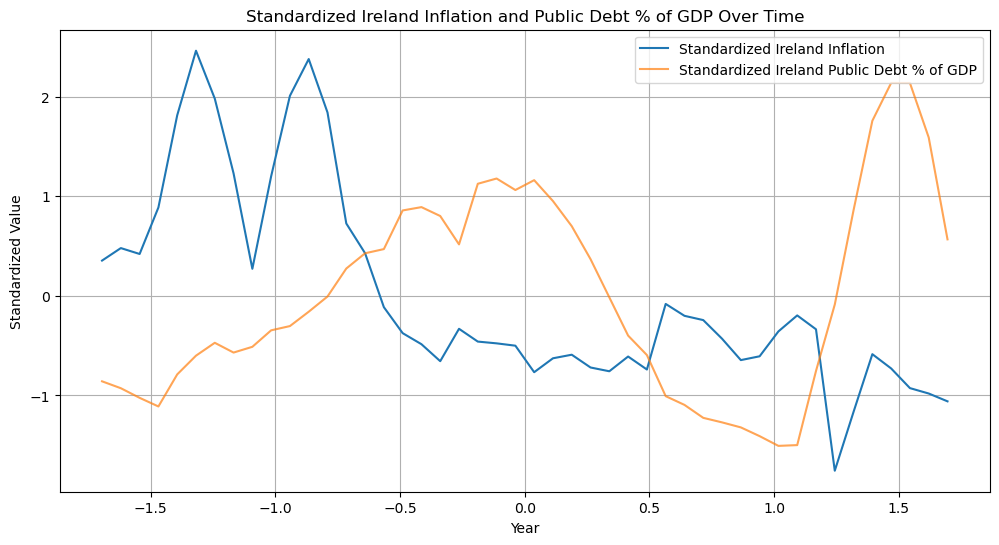

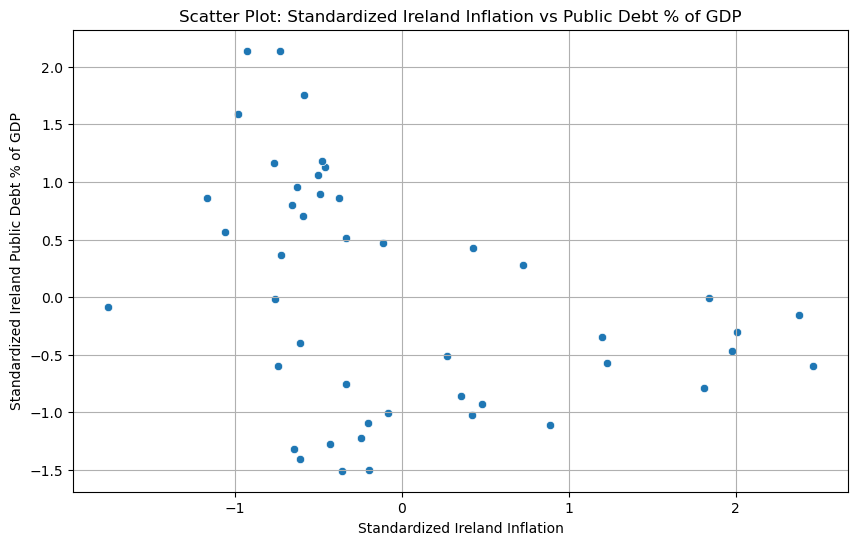

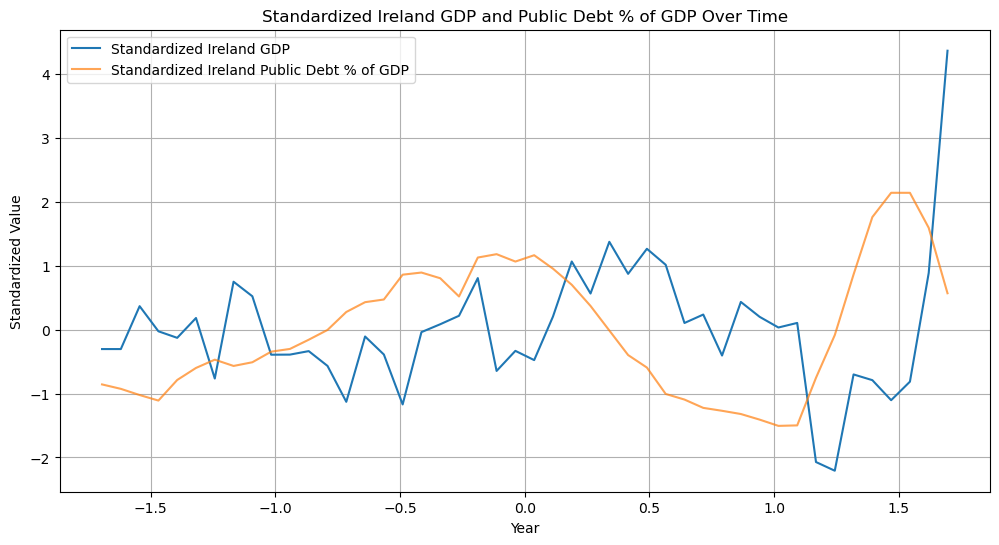

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler

# Standardizing the subset
standardizer = StandardScaler()
data_subset_standardized = data.copy()
data_subset_standardized = pd.DataFrame(standardizer.fit_transform(data), columns=data.columns)

# Graph 1: Standardized Ireland Inflation and Public Debt % of GDP Over Time
plt.figure(figsize=(12, 6))
plt.plot(data_subset_standardized['Year'], data_subset_standardized['Ireland_Inflation'], label='Standardized Ireland Inflation')
plt.plot(data_subset_standardized['Year'], data_subset_standardized['Ireland_Public_Debt_Pc_of_GDP'], label='Standardized Ireland Public Debt % of GDP', alpha=0.7)
plt.title('Standardized Ireland Inflation and Public Debt % of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.legend()
plt.grid(True)
plt.show()

# Graph 2: Scatter Plot between Standardized Ireland_Inflation and Ireland_Public_Debt_Pc_of_GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_subset_standardized, x='Ireland_Inflation', y='Ireland_Public_Debt_Pc_of_GDP')
plt.title('Scatter Plot: Standardized Ireland Inflation vs Public Debt % of GDP')
plt.xlabel('Standardized Ireland Inflation')
plt.ylabel('Standardized Ireland Public Debt % of GDP')
plt.grid(True)
plt.show()

# Graph 3: Standardized Ireland_GDP vs Ireland_Public_Debt_Pc_of_GDP over Time
plt.figure(figsize=(12, 6))
plt.plot(data_subset_standardized['Year'], data_subset_standardized['Ireland_GDP'], label='Standardized Ireland GDP')
plt.plot(data_subset_standardized['Year'], data_subset_standardized['Ireland_Public_Debt_Pc_of_GDP'], label='Standardized Ireland Public Debt % of GDP', alpha=0.7)
plt.title('Standardized Ireland GDP and Public Debt % of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Standardized Value')
plt.legend()
plt.grid(True)
plt.show()


# Statistics

In [15]:

import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load the dataset
data_stat = data_subset_standardized

# Calculating Pearson correlation coefficient for Ireland_GDP and Ireland_Public_Debt_Pc_of_GDP
pearson_corr_gdp_debt, p_value_gdp_debt = pearsonr(data_stat['Ireland_GDP'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

# Calculating Pearson correlation coefficient for Ireland_Inflation and Ireland_Public_Debt_Pc_of_GDP
pearson_corr_inf_debt, p_value_inf_debt = pearsonr(data_stat['Ireland_Inflation'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

# Calculating Spearman correlation coefficient for Ireland_GDP and Ireland_Public_Debt_Pc_of_GDP
spearman_corr_gdp_debt, spearman_p_value_gdp_debt = spearmanr(data_stat['Ireland_GDP'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

# Calculating Spearman correlation coefficient for Ireland_Inflation and Ireland_Public_Debt_Pc_of_GDP
spearman_corr_inf_debt, spearman_p_value_inf_debt = spearmanr(data_stat['Ireland_Inflation'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

(pearson_corr_gdp_debt, p_value_gdp_debt, pearson_corr_inf_debt, p_value_inf_debt, 
 spearman_corr_gdp_debt, spearman_p_value_gdp_debt, spearman_corr_inf_debt, spearman_p_value_inf_debt)


(-0.09537848855065326,
 0.5283507162258372,
 -0.35033352222837844,
 0.016992213642922516,
 -0.23472817551016403,
 0.11636424152833563,
 -0.4480419364785692,
 0.001793402628969717)

In [16]:
#Do the same but standardise (we should ssee no difference)

import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler

# Load the dataset again

data_stat = data

# Standardizing the relevant columns
scaler = StandardScaler()
data_stat[['Ireland_Inflation', 'Ireland_GDP', 'Ireland_Public_Debt_Pc_of_GDP']] = scaler.fit_transform(
    data_stat[['Ireland_Inflation', 'Ireland_GDP', 'Ireland_Public_Debt_Pc_of_GDP']])

# Perform Pearson and Spearman correlation tests after standardization

# Pearson correlation
pearson_corr_gdp_debt_std, p_value_gdp_debt_std = pearsonr(data_stat['Ireland_GDP'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])
pearson_corr_inf_debt_std, p_value_inf_debt_std = pearsonr(data_stat['Ireland_Inflation'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

# Spearman correlation
spearman_corr_gdp_debt_std, spearman_p_value_gdp_debt_std = spearmanr(data_stat['Ireland_GDP'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])
spearman_corr_inf_debt_std, spearman_p_value_inf_debt_std = spearmanr(data_stat['Ireland_Inflation'], data_stat['Ireland_Public_Debt_Pc_of_GDP'])

(pearson_corr_gdp_debt_std, p_value_gdp_debt_std, pearson_corr_inf_debt_std, p_value_inf_debt_std,
 spearman_corr_gdp_debt_std, spearman_p_value_gdp_debt_std, spearman_corr_inf_debt_std, spearman_p_value_inf_debt_std)


(-0.09537848855065326,
 0.5283507162258372,
 -0.35033352222837844,
 0.016992213642922516,
 -0.23472817551016403,
 0.11636424152833563,
 -0.4480419364785692,
 0.001793402628969717)

# Decomposition of the Data

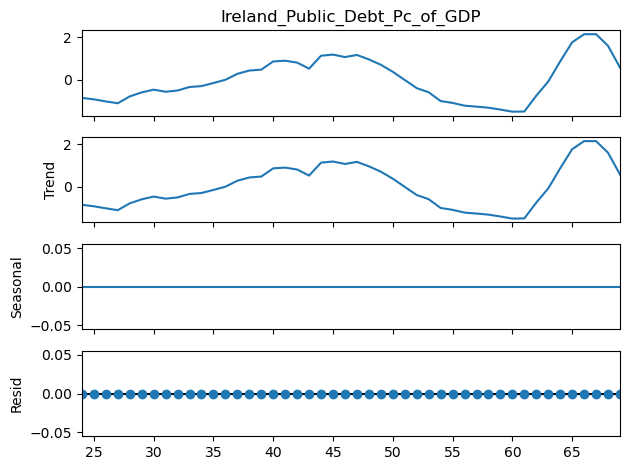

In [17]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
# Ensure the index is correctly formatted as datetime
#data.index = pd.to_datetime(data.index, format='%Y')

# Attempt to avoid directly setting the conflicting frequency, instead infer appropriately
decomposition = seasonal_decompose(data['Ireland_Public_Debt_Pc_of_GDP'], model='additive', period=1)

# Plot the decomposed components of the time series
decomposition.plot()
plt.show()




# Linear Regression to analyse Ireland_Public_Debt_Pc_of_GDP alone first

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = data.drop(['Ireland_Public_Debt_Pc_of_GDP'], axis=1)
y = data['Ireland_Public_Debt_Pc_of_GDP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.34540143925324795
R^2 Score: 0.6657839113303547


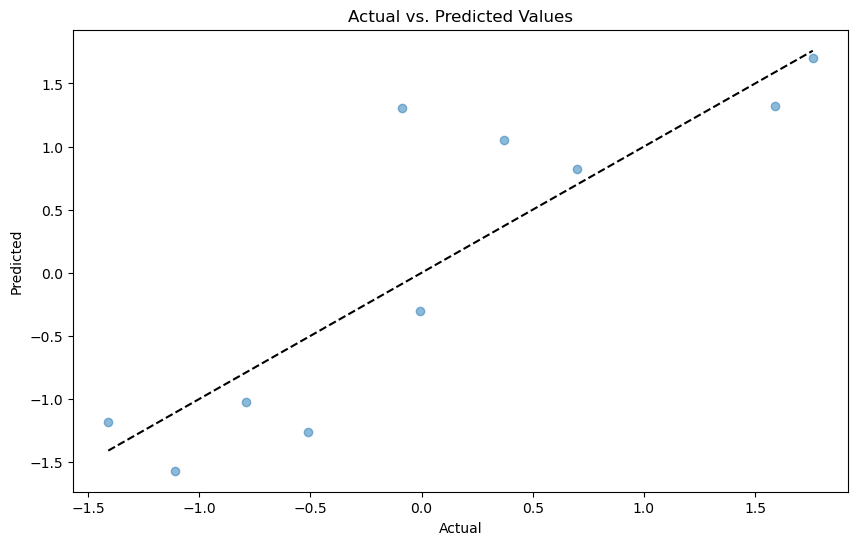

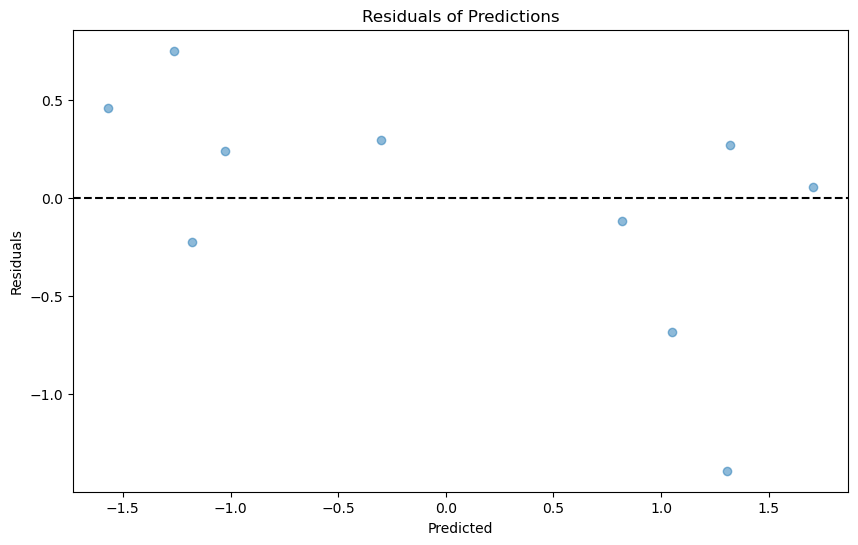

In [19]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()